In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The period is
0.02819852640234673 s +- 7.532628868737064e-07  s


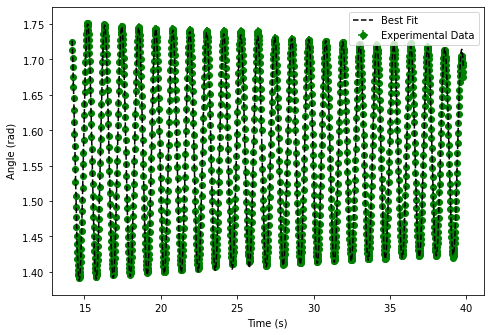

In [35]:
#Import position data at various times from a .txt file (can also do from .csv file). Can always convert an excel file to csv

#I only load in time and x position columns (not y), because we assume small angle approximation
tt,xx = np.transpose(np.loadtxt("PendulumPoints.txt",usecols=(0,1) ))

#I shift my points so that they are centered about the origin
xx = xx - (max(xx)+min(xx))/2

#Now also suppose there are uncertainties that are constant for each measurement. Let's initialize them as lists 
#(uncertainty at every point)

dtt = np.array(  [0.05  for x in tt]    )
dxx = np.array( [0.005  for x in xx ])

#Want to assume small angle approximation and say theta = arccos(xx/L)

L=0.8 #We set the value for the length of our pendulum string to 1 (you measure this in experiment)
#Suppose L is "exactly" measured (has 0 uncertainty). I am doing this for less formulas.
#YOU should computed uncertainty for everything. I am just lazy

theta = np.arccos(xx/L)

dtheta = np.array( [ np.abs( dxx[i] * 1/(np.sqrt(1 - (xx[i])**2) ) )   for i in range(len(theta))]  )

#We need to propagate uncertainty. 

#Now we expect theoretically, for the motion to be described by cosine multiplied by a decaying exponential. 
#So let's curve fit that


#We define our function:
fitFunction = lambda t,A,k,omega, phi, c: A*np.exp(-k*t)*np.cos( (omega*t - phi)/(2*np.pi) ) + c

#Sometimes curvefit needs a bit of help, so we define an "initial guess" for the parameters
pnot =np.array( [ (max(theta)-min(theta))/2, 0.1, 1, 0 ,0 ])

parameters, covMatrix = curve_fit(fitFunction,tt, theta, sigma = dtheta, absolute_sigma = True, p0 = pnot)
parameterUncertainties = np.sqrt(np.diag(covMatrix))


mainFigure = plt.figure()
mp = mainFigure.add_axes([0,0,1,1])

mp.set_xlabel("Time (s)")
mp.set_ylabel("Angle (rad)")

mp.errorbar(tt,theta,xerr= dtt, yerr = dtheta, ls= '',color= 'green', marker = 'o', label = 'Experimental Data',zorder=0 )


actualFit = lambda t: fitFunction(t, *parameters)

mp.plot(tt, actualFit(tt), color= 'black', ls = '--', label = "Best Fit",zorder=1 )

mp.legend()

#Changes the axes tick label from 1e6 to scientific notation
mp.ticklabel_format(style='sci',useMathText = True)



#Now let's figure out the period and print them

#Omega was the 3d parameter (frequency)

T = 1/(parameters[2])
dT = np.abs(parameterUncertainties[2]/(parameters[2]**2))
print("The period is")
print( T, "s +-", dT, " s")



In [ ]:
#Same thing without extra spaces and comments
tt,xx = np.transpose(np.loadtxt("PendulumPoints.txt",usecols=(0,1) ))

xx = xx - (max(xx)+min(xx))/2

dtt = np.array(  [0.05  for x in tt]    )
dxx = np.array( [0.005  for x in xx ])

theta = np.arccos(xx/L)
dtheta = np.array( [ np.abs( dxx[i] * 1/(np.sqrt(1 - (xx[i])**2) ) )   for i in range(len(theta))]  )

fitFunction = lambda t,A,k,omega, phi, c: A*np.exp(-k*t)*np.cos( (omega*t - phi)/(2*np.pi) ) + c
pnot =np.array( [ (max(theta)-min(theta))/2, 0.1, 1, 0 ,0 ])

parameters, covMatrix = curve_fit(fitFunction,tt, theta, sigma = dtheta, absolute_sigma = True, p0 = pnot)
parameterUncertainties = np.sqrt(np.diag(covMatrix))

mainFigure = plt.figure()
mp = mainFigure.add_axes([0,0,1,1])

mp.set_xlabel("Time (s)")
mp.set_ylabel("Angle (rad)")

mp.errorbar(tt,theta,xerr= dtt, yerr = dtheta, ls= '',color= 'green', marker = 'o', label = 'Experimental Data',zorder=0 )

actualFit = lambda t: fitFunction(t, *parameters)

mp.plot(tt, actualFit(tt), color= 'black', ls = '--', label = "Best Fit",zorder=1 )
mp.legend()
#Changes the axes tick label from 1e6 to scientific notation
mp.ticklabel_format(style='sci',useMathText = True)
T = 1/(parameters[2])
dT = np.abs(parameterUncertainties[2]/(parameters[2]**2))
print("The period is")
print( T, "s +-", dT, " s")